# **Convolutional Neural Network (CNN) Using TensorFlow Sequential API**

### **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

### **Download and Prepare the MNIST Dataset**

The MNIST dataset contains 60,000 grayscale images of handwritten digits (0-9) for training and 10,000 images for testing.

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data: normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to include the color channel dimension (1 channel for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### **Verify the Data**

Plot the first 25 images in the training set along with their labels.

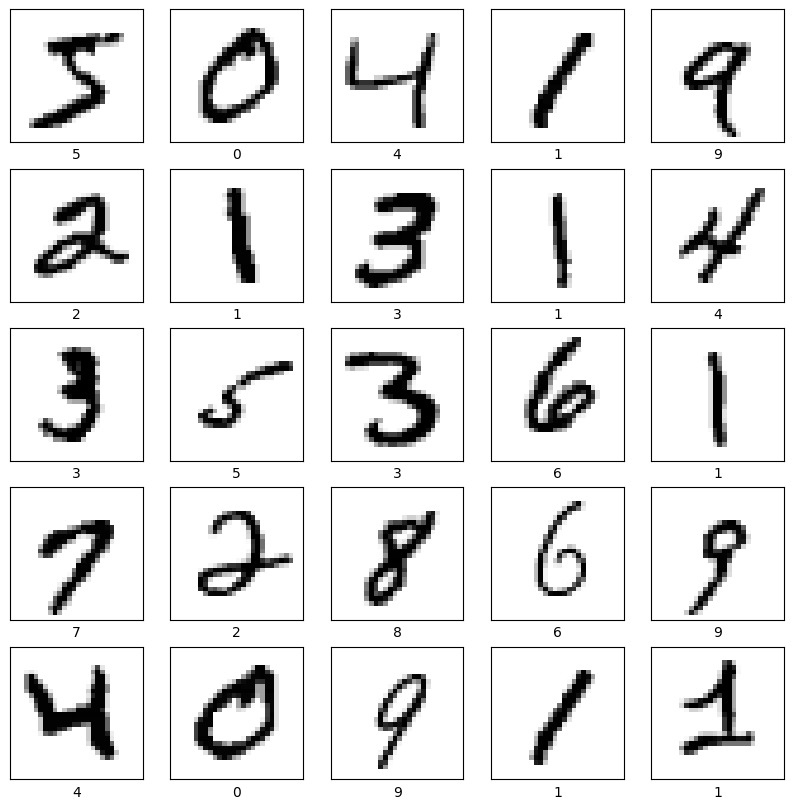

In [3]:
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Build the CNN Model Using Sequential API**

Create a simple CNN using the Sequential API with 2 convolutional layers and 1 fully connected layer.

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Display the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

### **Compile and Train the Model**

Compile the model with an optimizer and loss function, then train it on the MNIST dataset.

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8, 
                    validation_data=(test_images, test_labels))


Epoch 1/8


1875/1875 [==============================] - 38s 18ms/step - loss: 0.1499 - accuracy: 0.9537 - val_loss: 0.0527 - val_accuracy: 0.9830
Epoch 2/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0451 - val_accuracy: 0.9852
Epoch 3/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0298 - val_accuracy: 0.9909
Epoch 4/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0261 - val_accuracy: 0.9912
Epoch 5/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0285 - val_accuracy: 0.9917
Epoch 6/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0275 - val_accuracy: 0.9908
Epoch 7/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0316 - val

### **Evaluate and Plot the Results**

Plot the training and validation accuracy over epochs and evaluate the model on the test set.

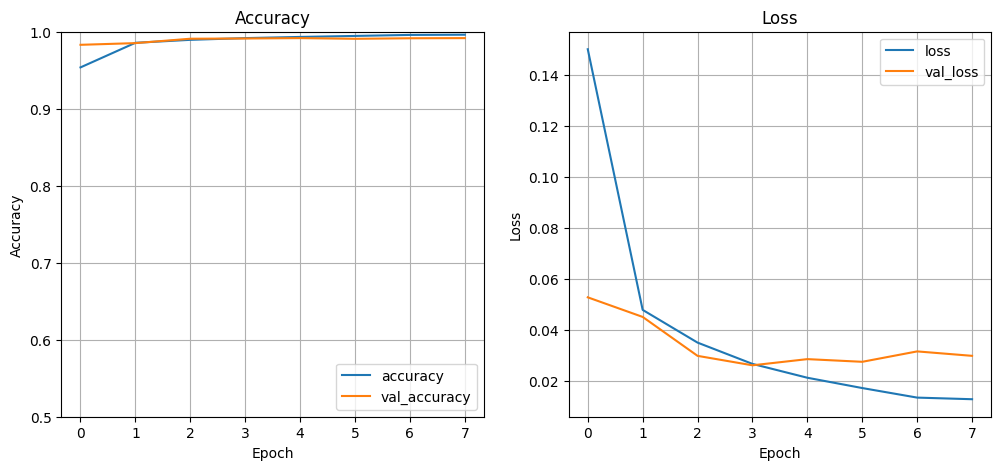

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.grid()

plt.show()

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predict the labels of the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels))

313/313 - 2s - loss: 0.0298 - accuracy: 0.9917 - 2s/epoch - 8ms/step
Test accuracy: 0.9916999936103821
313/313 [==============================] - 3s 8ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



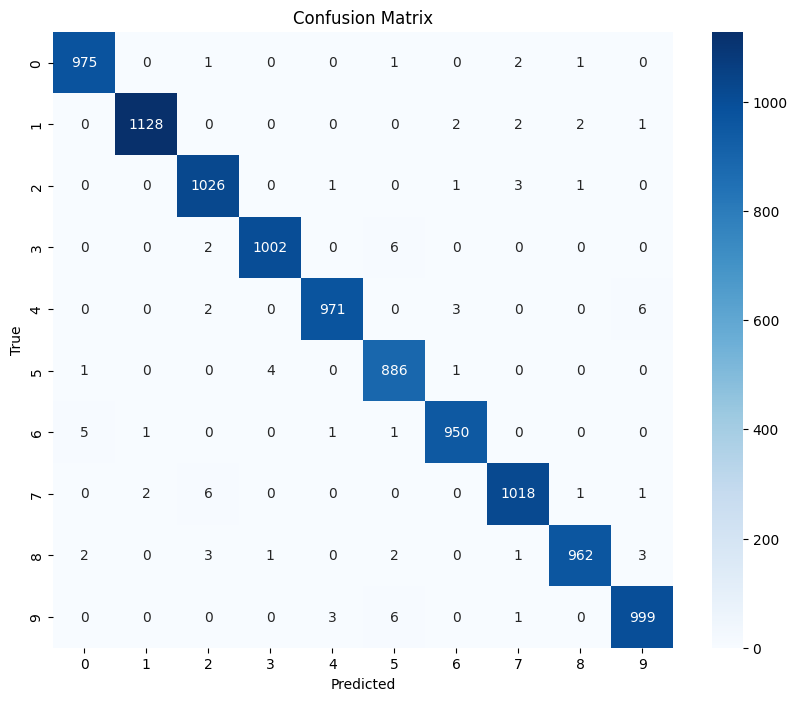

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

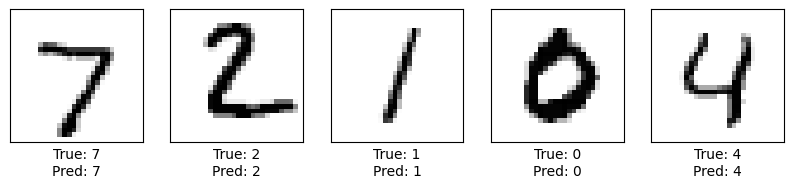

In [9]:
# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
plt.show()